## Titanic
Vamos analisar os dados dos passageiros do Titanic. Começamos importando os dados de um arquivo csv ou carregando um dataset disponível no pacote Seaborn.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Para termos um entendimento inicial do data frame utilizado, podemos utilizar o comando shape. Como o nome sugere, este comando nos informará o formato do dataframe em termos de linhas e colunas.

In [2]:
df.shape

(891, 15)

Para entendermos melhor o formato do data frame, podemos utilizar o comando head, que lista os 5 primeiros registros do data frame.

In [9]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Dá pra saber também os tipos de dados de cada coluna com o comando dtypes.

In [8]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Outro ponto importante é entender que na maioria dos dataframes há dados incompletos. Para analisar quais dados estão imcompletos no nosso dataframe usaremos o comando isnull.

In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Vamos agora usar um pouco de estatística descritiva para termos alguns insights a respeito das informações dos passageiros do Titanic. Vamos começar analisando a média, a mediana e a moda da idade dos passageiros.

In [13]:
df['age'].mean()

29.69911764705882

In [14]:
df['age'].median()

28.0

In [15]:
df['age'].mode()

0    24.0
Name: age, dtype: float64

Vamos agora plotar histogramas das colunas nas quais é possível aplicar a geração automática de histogramas. A geração automática depende do tipo de dado da coluna.

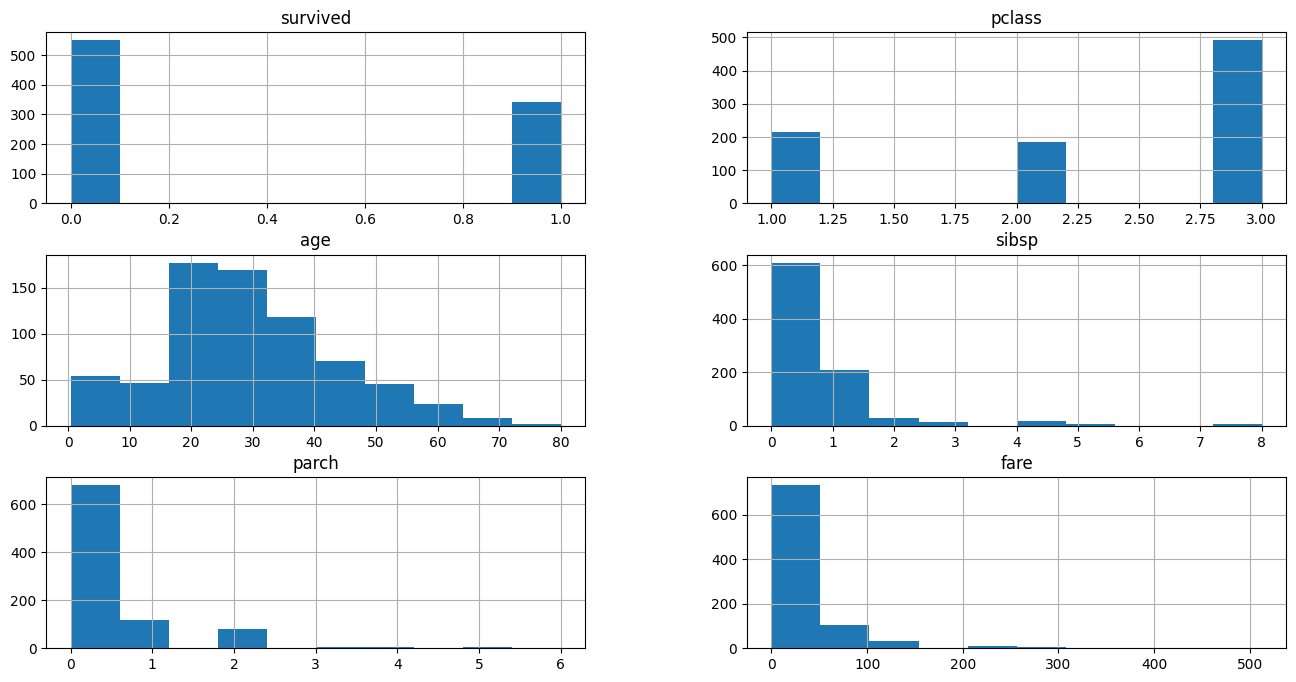

In [16]:
df.hist(figsize=(16,8));

Vamos agora plotar um histograma de uma coluna específica (Idade).

array([[<Axes: title={'center': 'age'}>]], dtype=object)

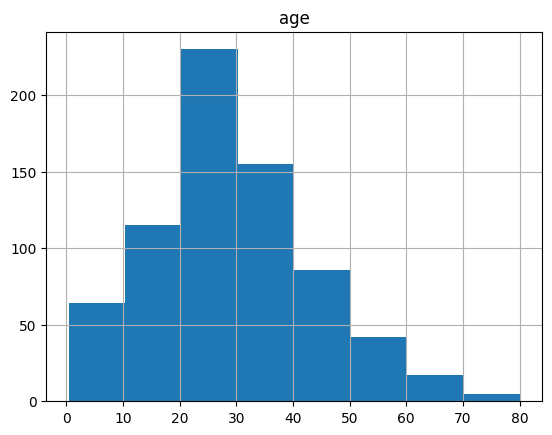

In [17]:
df.hist(column= 'age', bins=8)

Agora vamos plotar um histograma da tarifa paga por cada passageiro.

array([[<Axes: title={'center': 'fare'}>]], dtype=object)

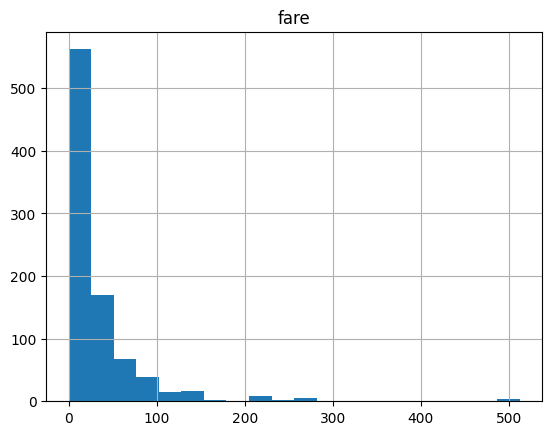

In [22]:
df.hist(column= 'fare', bins=20)

Vamos verfatores que podem ter impactado a sobrevivência dos passageiros, começando pelo sexo. Vamos iniciar plotanto um gráfico que mostra o número de mortos e sobreviventes. 

<Axes: xlabel='alive', ylabel='count'>

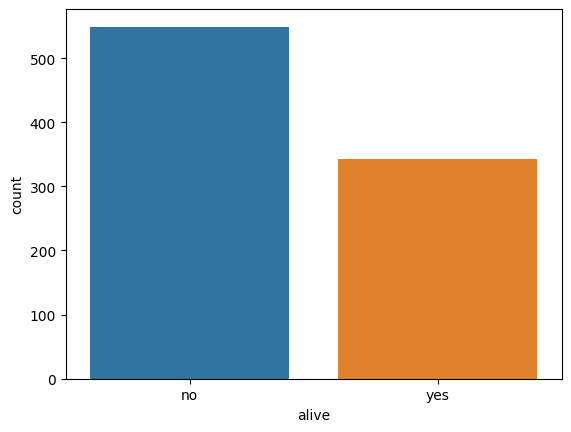

In [23]:
sns.countplot(x='alive', data=df)

Mulheres e homens morreram em igual proporção?

<Axes: xlabel='sex', ylabel='count'>

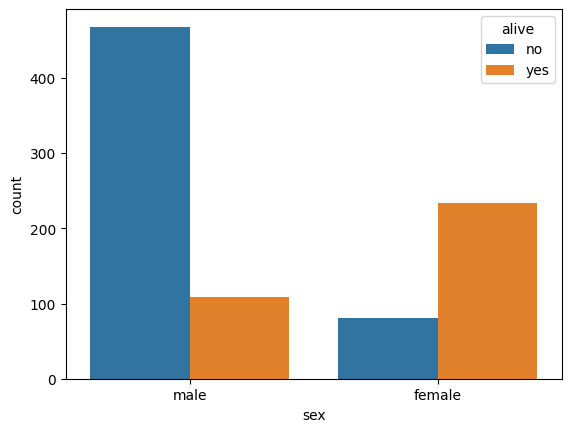

In [24]:
sns.countplot(x='sex', hue='alive', data=df)


A proporção de mortes foi igual em todas as classes do navio? (Primeira classe: mais cara; terceira classe: mais barata).

<Axes: xlabel='pclass', ylabel='count'>

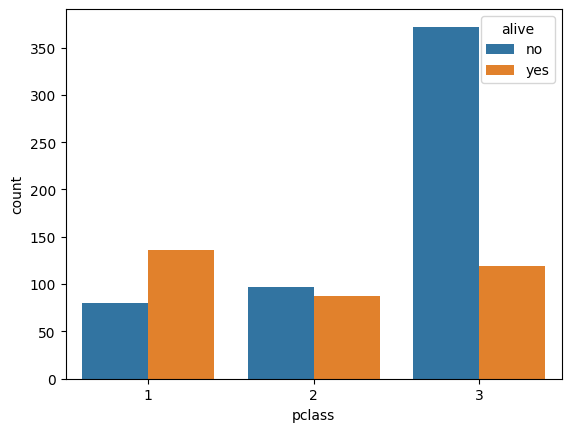

In [26]:
sns.countplot(x='pclass', hue='alive', data=df)


Gráficos de pizza são também interessantes para comparar proporções. Vamos plotar um gráfico de pizza para comparar o número total de sobreviventes vs não sobreviventes.

/tmp/ipykernel_9723/2400788417.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sobrev = df[df.survived==1].count()[0]
/tmp/ipykernel_9723/2400788417.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nao_sobrev = df[df.survived==0].count()[0]


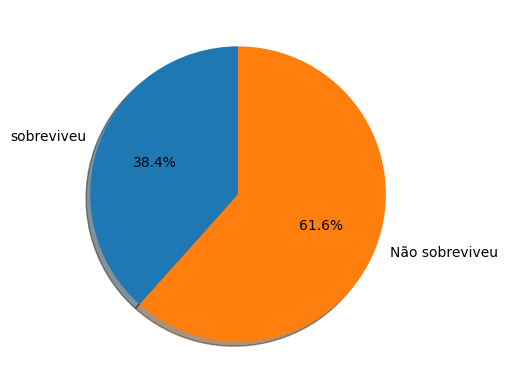

In [33]:
sobrev = df[df.survived==1].count()[0]
nao_sobrev = df[df.survived==0].count()[0]
plt.pie([sobrev, nao_sobrev], 
        labels=['sobreviveu', 'Não sobreviveu'], 
        autopct='%1.1f%%', shadow=True, startangle=90);


